In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
import os

In [2]:
df = pd.read_csv("../data/processed/cleaned_data.csv")

# ✅ Basic check
df.head()

,cage_id,is_flagged,dwell_time_minutes
0,CAGE_0001,0,16.03
1,CAGE_0002,1,17.63
2,CAGE_0003,1,14.85
3,CAGE_0004,1,10.27
4,CAGE_0005,0,12.30


In [3]:
# Grouped statistics
summary_stats = (
    df.groupby("is_flagged")["dwell_time_minutes"]
    .agg(["count", "mean", "std"])
    .reset_index()
)

# Map 0 and 1 to more readable labels
summary_stats["is_flagged"] = summary_stats["is_flagged"].map({0: "Unflagged", 1: "Flagged"})

# Round for reporting
summary_stats["mean"] = summary_stats["mean"].round(2)
summary_stats["std"] = summary_stats["std"].round(2)

summary_stats


,is_flagged,count,mean,std
0,Unflagged,241,14.86,2.92
1,Flagged,259,12.17,3.11


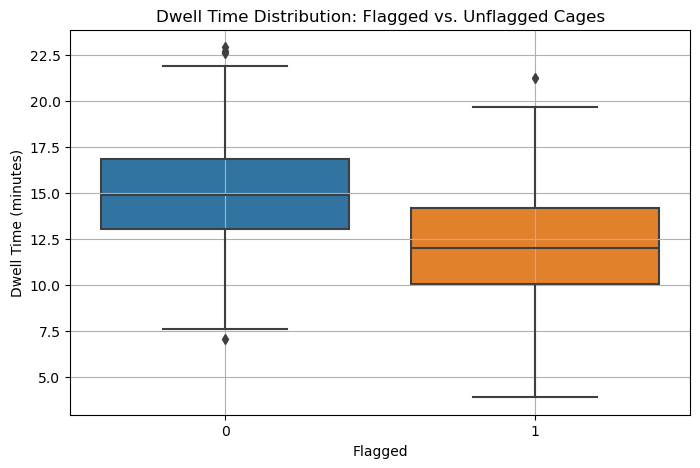

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="is_flagged", y="dwell_time_minutes", data=df)
plt.title("Dwell Time Distribution: Flagged vs. Unflagged Cages")
plt.xlabel("Flagged")
plt.ylabel("Dwell Time (minutes)")
plt.grid(True)
plt.show()

C:\Users\joshb\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


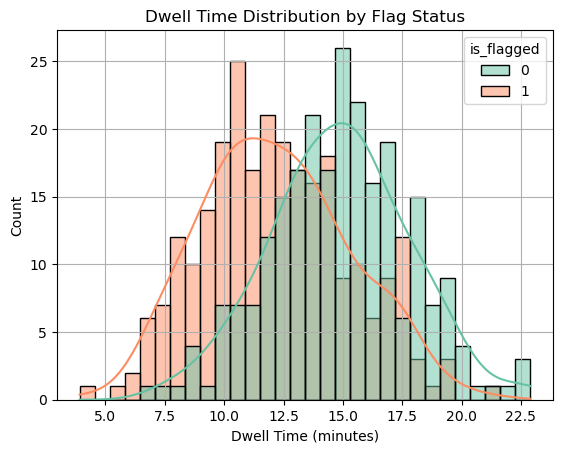

In [5]:
sns.histplot(data=df, x="dwell_time_minutes", hue="is_flagged", bins=30, kde=True, palette="Set2")
plt.title("Dwell Time Distribution by Flag Status")
plt.xlabel("Dwell Time (minutes)")
plt.grid(True)
plt.show()

In [7]:
flagged = df[df["is_flagged"] == 1]["dwell_time_minutes"]
unflagged = df[df["is_flagged"] == 0]["dwell_time_minutes"]

t_stat, p_val = ttest_ind(flagged, unflagged, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("❗ Statistically significant difference in dwell time!")
else:
    print("✅ No statistically significant difference in dwell time.")

T-statistic: -9.9786
P-value: 0.0000
❗ Statistically significant difference in dwell time!


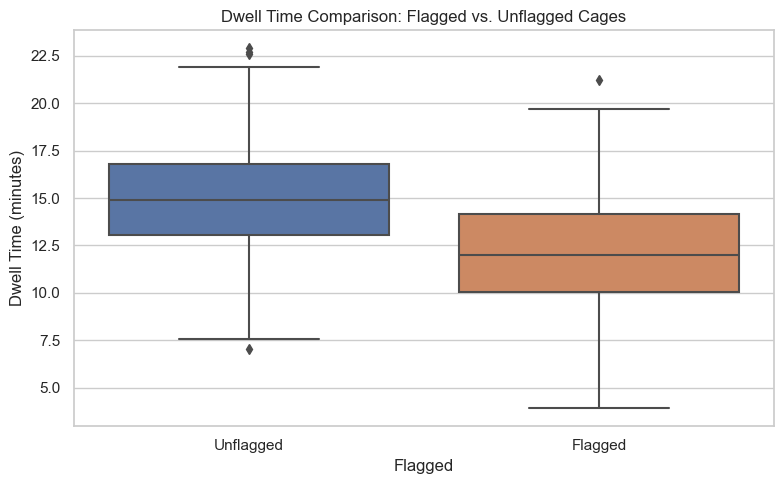

In [8]:
df["is_flagged"] = df["is_flagged"].astype(int)
df["is_flagged"] = df["is_flagged"].map({0: "Unflagged", 1: "Flagged"})

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x="is_flagged", y="dwell_time_minutes", data=df)
plt.title("Dwell Time Comparison: Flagged vs. Unflagged Cages")
plt.xlabel("Flagged")
plt.ylabel("Dwell Time (minutes)")
plt.tight_layout()

# Save
output_dir = "../reports/figures"
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, "boxplot.png"), dpi=300)
plt.show()